In [1]:
%pip install q keras==2.2.4
%pip install tensorflow==2.12

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.2.4 which is incompatible.


  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print(tf.__version__)


2.12.0


In [3]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [6]:
!nvidia-smi

Thu Oct 12 14:21:33 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.34                 Driver Version: 537.34       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   53C    P0              14W / 140W |    838MiB /  8188MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Preparar datos

In [45]:
X_raw = np.load('X.npy')
X_raw = X_raw/255.
y = np.load('y.npy')
X = []
size = (28,28)
for x in X_raw:
    X.append(resize(x, size))
X = np.array(X)

[]

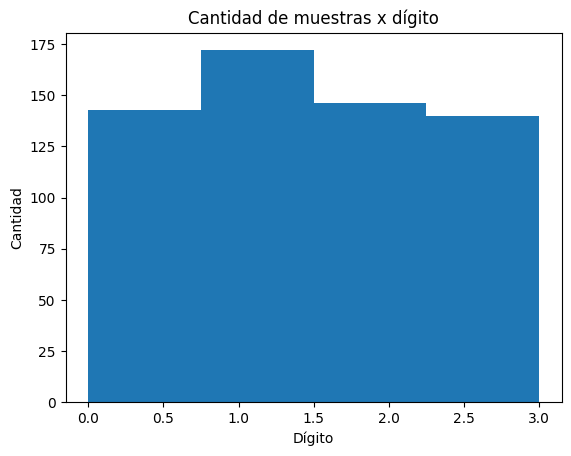

In [46]:
plt.figure()
plt.title("Cantidad de muestras x dígito")
plt.ylabel("Cantidad")
plt.xlabel("Dígito")
plt.hist(y, bins=4)
plt.plot()

### Visualizando el `dataset`

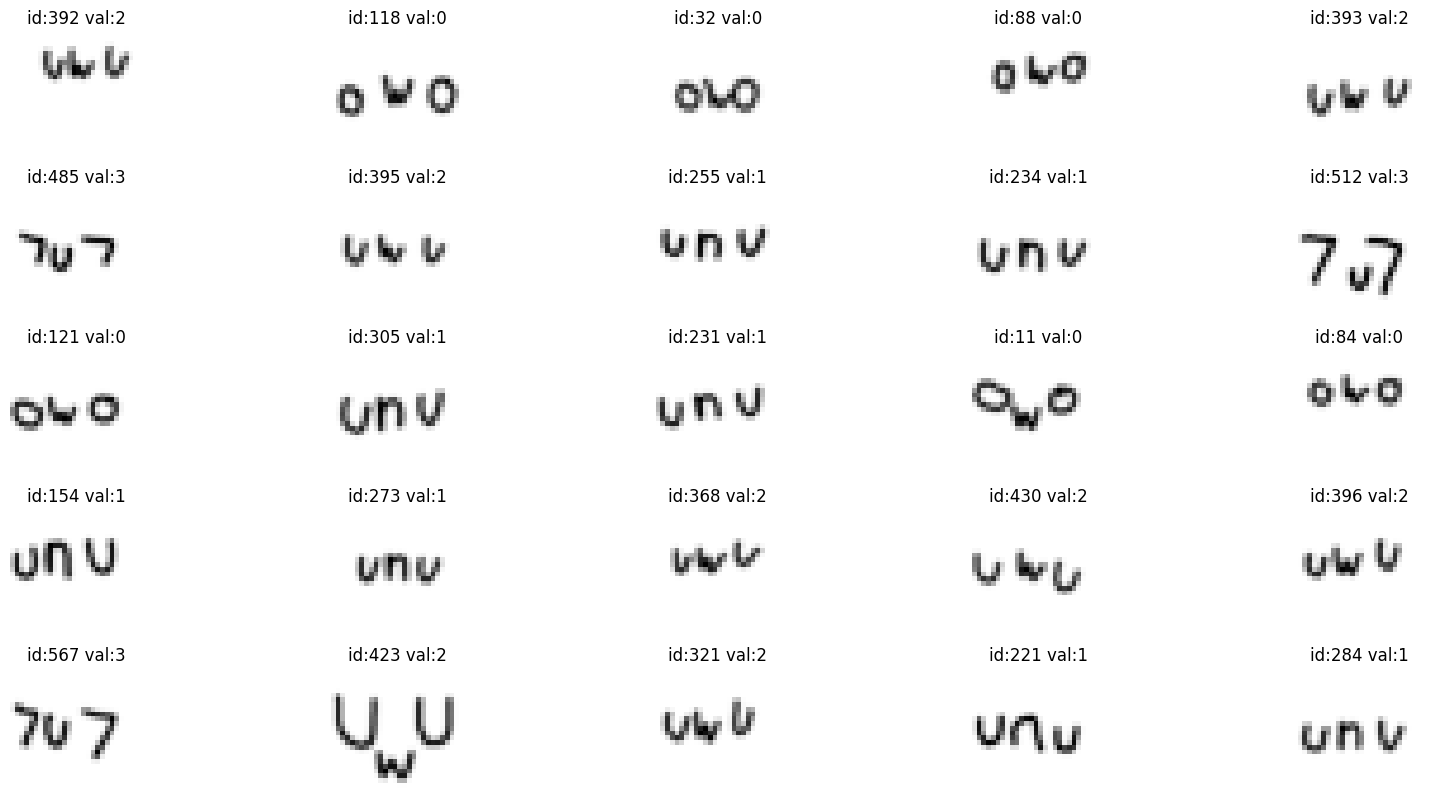

In [47]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    idx = np.random.choice(X.shape[0], 1)[0]
    plt.title('id:{} val:{}'.format(idx, y[idx] ))
    plt.imshow(-X[idx], cmap='gray')
    plt.axis('off')
plt.show()

### Split de train-test

In [48]:
X.shape

(601, 28, 28)

In [49]:
y.shape

(601,)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

[]

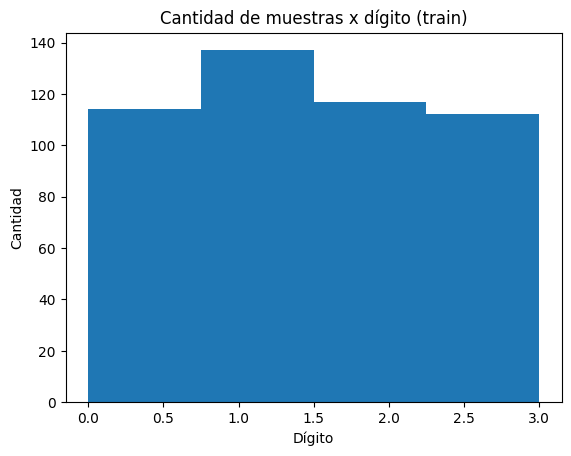

In [51]:
plt.figure()
plt.title("Cantidad de muestras x dígito (train)")
plt.ylabel("Cantidad")
plt.xlabel("Dígito")
plt.hist(y_train, bins=4)
plt.plot()

[]

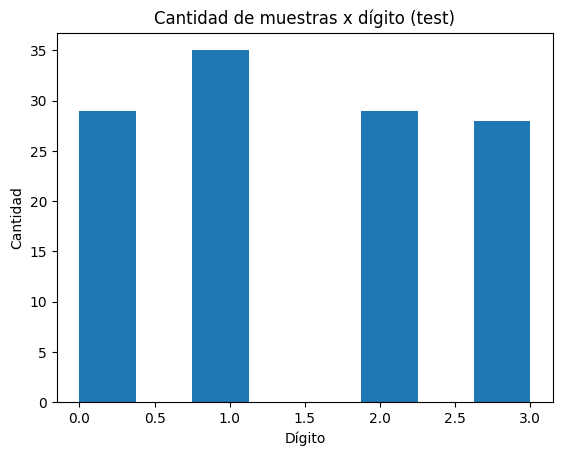

In [52]:
plt.figure()
plt.title("Cantidad de muestras x dígito (test)")
plt.ylabel("Cantidad")
plt.xlabel("Dígito")
plt.hist(y_test, bins=8)
plt.plot()

In [53]:
# Ajustamos las dimensiones de las imágenes
if X_train.ndim == 3:
    X_train = X_train[...,None]
    X_test = X_test[..., None]
    print(X_train.shape, X_test.shape)

(480, 28, 28, 1) (121, 28, 28, 1)


## Definimos un modelo

In [55]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.python.keras.optimizers import gradient_descent_v2


bs = 16
lr = 0.0005

#Espacio de busqueda
#Cantidad Filtros: 32, 64, 128, 256
#Tamaño del Filtro: 3, 5, 7
#Activaciones: 'relu', 'sigmoid', 'tanh'
#Unidades Dense: 128, 256, 100..
#lr: 0.001, 0.0001, 0.00001, etc
#bs: 8, 16, 32...

model = Sequential([Conv2D(32, 3, activation='tanh', input_shape=(*size,1)),
                    MaxPool2D(),
                    Conv2D(64, 3, activation='tanh', padding ='same'),
                    MaxPool2D(),
                    Conv2D(128, 3, activation='tanh', padding ='same'),
                    MaxPool2D(),
                    Flatten(),
                    Dense(1024, activation='tanh'), #modificar!
                    Dense(4, activation='softmax')]) #no modificar

optimizer1=gradient_descent_v2.SGD(learning_rate=lr)
model.compile(optimizer= optimizer1, loss='sparse_categorical_crossentropy' , metrics=['accuracy'])
# La pérdida 'sparse_categorical_crossentropy' realiza automaticamente la conversión
# del target a one-hot encoding.

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)             

In [56]:
import numpy as np

print(type(y_train[0]))

<class 'numpy.int32'>


In [57]:
print(y_train)

[1 0 2 0 0 2 2 3 1 1 3 3 0 1 3 3 3 2 0 1 3 2 0 0 2 3 0 0 1 2 0 0 3 2 2 2 3
 0 1 2 2 2 3 3 1 1 1 1 1 1 3 3 0 1 1 3 2 0 2 3 0 1 3 3 0 1 3 1 0 3 3 3 2 0
 2 3 0 3 2 0 1 1 0 2 3 3 2 1 1 1 1 0 1 1 2 2 2 0 3 2 3 0 0 0 0 1 1 1 3 2 1
 1 3 3 0 0 3 1 2 1 1 1 2 3 2 2 2 3 3 2 1 2 3 0 1 3 2 1 1 0 0 1 1 0 2 2 0 2
 2 0 2 1 2 1 0 1 1 0 0 1 3 0 0 2 3 3 1 1 1 1 3 2 0 2 0 1 0 3 0 3 2 0 0 2 1
 2 0 1 0 0 1 2 2 0 3 1 1 1 2 2 0 1 1 3 3 1 1 3 2 1 2 0 2 3 0 3 2 1 0 3 0 0
 0 1 1 3 0 0 2 0 1 2 2 2 2 3 3 3 2 2 3 3 0 2 3 0 1 2 0 3 2 3 0 3 3 0 1 2 1
 2 3 2 1 1 2 0 2 0 1 3 2 2 2 2 0 2 1 1 2 0 3 0 1 0 1 1 2 2 1 3 2 0 0 0 3 1
 2 0 2 1 1 3 2 3 1 1 1 1 3 0 0 0 2 2 1 3 0 3 0 0 2 0 3 3 0 0 3 1 3 0 2 0 0
 0 2 3 2 3 0 2 2 2 1 1 3 1 0 2 1 3 1 3 2 3 0 3 1 2 0 2 0 0 1 3 1 1 3 1 1 0
 2 3 0 1 2 1 3 0 3 3 3 0 3 1 2 2 1 2 0 1 2 3 0 3 3 1 0 2 1 0 0 1 1 1 1 3 1
 1 3 0 1 2 3 3 1 3 0 3 1 1 3 2 3 3 1 1 2 3 0 3 2 3 2 1 0 3 1 1 3 1 1 0 0 2
 1 0 1 1 2 3 2 3 2 0 2 1 2 1 2 1 2 2 2 1 2 3 1 0 0 1 1 2 3 3 1 1 1 1 0 1]


## Entrenamiento

In [61]:
log = model.fit(X_train, y_train, batch_size=bs, epochs=500, validation_data=(X_test, y_test))

Epoch 1/500
30/30 [==============================] - 0s 10ms/step - loss: 0.8000 - accuracy: 0.8208 - val_loss: 0.8781 - val_accuracy: 0.7355
Epoch 2/500
30/30 [==============================] - 0s 9ms/step - loss: 0.7967 - accuracy: 0.8188 - val_loss: 0.8753 - val_accuracy: 0.7355
Epoch 3/500
30/30 [==============================] - 0s 9ms/step - loss: 0.7935 - accuracy: 0.8229 - val_loss: 0.8723 - val_accuracy: 0.7355
Epoch 4/500
30/30 [==============================] - 0s 10ms/step - loss: 0.7901 - accuracy: 0.8208 - val_loss: 0.8694 - val_accuracy: 0.7273
Epoch 5/500
30/30 [==============================] - 0s 9ms/step - loss: 0.7867 - accuracy: 0.8250 - val_loss: 0.8666 - val_accuracy: 0.7438
Epoch 6/500
30/30 [==============================] - 0s 9ms/step - loss: 0.7833 - accuracy: 0.8333 - val_loss: 0.8635 - val_accuracy: 0.7355
Epoch 7/500
30/30 [==============================] - 0s 10ms/step - loss: 0.7801 - accuracy: 0.8313 - val_loss: 0.8606 - val_accuracy: 0.7438
Epoch 8/50

In [62]:
def show_results(model, log):
    loss, acc = model.evaluate(X_test, y_test, batch_size=512, verbose=False)
    print(f'Loss     = {loss:.4f}')
    print(f'Accuracy = {acc:.4f}')
    val_loss = log.history['val_loss']
    val_acc = log.history['val_accuracy']
    fig, axes = plt.subplots(1, 2, figsize=(14,4))
    ax1, ax2 = axes
    ax1.plot(log.history['loss'], label='train')
    ax1.plot(val_loss, label='test')
    ax1.set_xlabel('epoch'); ax1.set_ylabel('loss')
    ax2.plot(log.history['accuracy'], label='train')
    ax2.plot(val_acc, label='test')
    ax2.set_xlabel('epoch'); ax2.set_ylabel('acc')
    for ax in axes: ax.legend()

Loss     = 0.1770
Accuracy = 0.9669


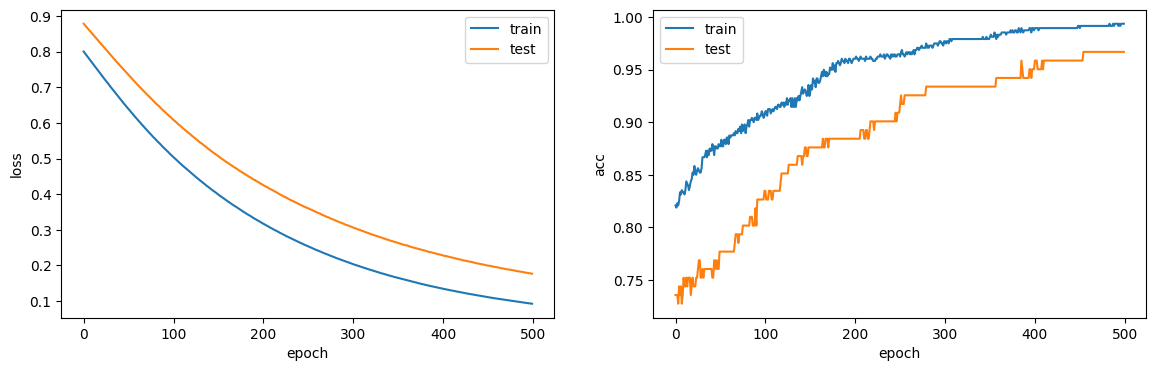

In [63]:
show_results(model, log)

## Probando el modelo

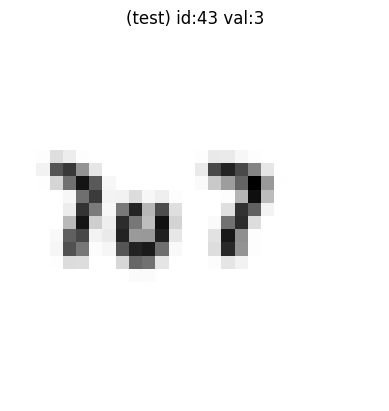

In [64]:
idx = np.random.choice(X_test.shape[0], 1)[0]
im = X_test[idx]
label = y_test[idx]
plt.title('(test) id:{} val:{}'.format(idx, label ))
plt.axis('off')
plt.imshow(-im[:,:,0], cmap='gray')
plt.show()

## Usando el modelo entrenado

In [65]:
salida = model.predict(im[None,:,:,:])[0]
salida

array([3.9431590e-04, 1.5163384e-03, 5.8811256e-03, 9.9220818e-01],
      dtype=float32)

[]

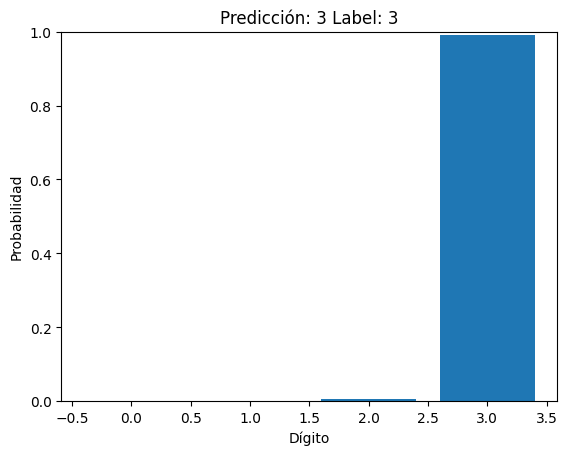

In [66]:
plt.figure()
plt.title("Predicción: {} Label: {}".format(salida.argmax(), label ))
plt.ylabel("Probabilidad")
plt.xlabel("Dígito")
plt.ylim([0,1])
plt.bar(np.arange(4), salida)
plt.plot()

Para guardar el modelo

In [67]:
model.save('modelo_entrenado.h5')